In [1]:
# 01_data_generation.ipynb
# Meta-Learning for Learned Indexes: Synthetic Data Generation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, Dict
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

print("✓ Imports successful")

✓ Imports successful


In [2]:
# ==============================================================================
# PART 1: DATA GENERATION FUNCTIONS
# ==============================================================================

def generate_linear_data(n: int = 50000, noise: float = 0.0) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate uniformly distributed keys with linear pattern.
    Perfect for simple linear regression models.

    Args:
        n: Number of keys to generate
        noise: Amount of randomness to add (0.0 = perfect linear)

    Returns:
        keys: Sorted array of keys
        positions: Corresponding array positions (0 to n-1)
    """
    keys = np.linspace(0, 1000000, n)

    if noise > 0:
        # Add some jitter to make it more realistic
        keys += np.random.normal(0, noise * 1000, n)
        keys = np.sort(keys)

    positions = np.arange(n)

    return keys, positions


def generate_polynomial_data(n: int = 50000, degree: int = 2) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate keys following a polynomial distribution.
    Good for testing polynomial regression models.

    Args:
        n: Number of keys
        degree: Polynomial degree (2 = quadratic, 3 = cubic)

    Returns:
        keys: Sorted array of keys
        positions: Corresponding array positions
    """
    # Generate positions uniformly
    positions = np.arange(n)

    # Create polynomial mapping: key = position^degree
    x = np.linspace(0, 100, n)
    keys = x ** degree

    # Scale to reasonable range
    keys = (keys - keys.min()) / (keys.max() - keys.min()) * 1000000

    return keys, positions


def generate_step_function_data(n: int = 50000, num_steps: int = 5) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate keys with step function pattern (piecewise constant).
    Challenging for linear models, good for decision trees.

    Args:
        n: Number of keys
        num_steps: Number of distinct steps

    Returns:
        keys: Sorted array of keys with step pattern
        positions: Corresponding array positions
    """
    positions = np.arange(n)

    # Create step boundaries
    step_size = n // num_steps
    keys = np.zeros(n)

    for i in range(num_steps):
        start_idx = i * step_size
        end_idx = (i + 1) * step_size if i < num_steps - 1 else n

        # Each step has a different key range
        step_start = i * 200000
        step_end = step_start + 150000

        keys[start_idx:end_idx] = np.linspace(step_start, step_end, end_idx - start_idx)

    return keys, positions


def generate_clustered_data(n: int = 50000, num_clusters: int = 4) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate keys with clustered/gapped pattern.
    Simulates real-world data with dense regions and gaps.

    Args:
        n: Number of keys
        num_clusters: Number of dense clusters

    Returns:
        keys: Sorted array of keys with clusters
        positions: Corresponding array positions
    """
    keys_per_cluster = n // num_clusters
    all_keys = []

    for i in range(num_clusters):
        # Each cluster centered around different point
        cluster_center = i * 300000 + 100000
        cluster_keys = np.random.normal(cluster_center, 20000, keys_per_cluster)
        all_keys.extend(cluster_keys)

    keys = np.sort(np.array(all_keys))
    positions = np.arange(len(keys))

    return keys, positions


def generate_exponential_data(n: int = 50000) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate keys following exponential distribution.
    Tests model's ability to handle skewed data.

    Args:
        n: Number of keys

    Returns:
        keys: Sorted array of keys
        positions: Corresponding array positions
    """
    positions = np.arange(n)

    # Generate exponentially distributed values
    keys = np.random.exponential(scale=50000, size=n)
    keys = np.sort(keys)

    # Scale to standard range
    keys = (keys / keys.max()) * 1000000

    return keys, positions

In [3]:
# ==============================================================================
# PART 2: DATASET GENERATION
# ==============================================================================

print("\\n" + "="*80)
print("GENERATING DATASETS")
print("="*80)

# Generate all dataset types
datasets = {}

print("\\n1. Linear Dataset (uniform spacing)...")
datasets['linear'] = generate_linear_data(n=50000, noise=0.0)
print(f"   Generated {len(datasets['linear'][0])} keys")

print("\\n2. Linear with Noise (realistic uniform)...")
datasets['linear_noisy'] = generate_linear_data(n=50000, noise=0.05)
print(f"   Generated {len(datasets['linear_noisy'][0])} keys")

print("\\n3. Quadratic Dataset (polynomial degree 2)...")
datasets['quadratic'] = generate_polynomial_data(n=50000, degree=2)
print(f"   Generated {len(datasets['quadratic'][0])} keys")

print("\\n4. Cubic Dataset (polynomial degree 3)...")
datasets['cubic'] = generate_polynomial_data(n=50000, degree=3)
print(f"   Generated {len(datasets['cubic'][0])} keys")

print("\\n5. Step Function (5 steps)...")
datasets['step'] = generate_step_function_data(n=50000, num_steps=5)
print(f"   Generated {len(datasets['step'][0])} keys")

print("\\n6. Clustered Data (4 clusters)...")
datasets['clustered'] = generate_clustered_data(n=50000, num_clusters=4)
print(f"   Generated {len(datasets['clustered'][0])} keys")

print("\\n7. Exponential Distribution...")
datasets['exponential'] = generate_exponential_data(n=50000)
print(f"   Generated {len(datasets['exponential'][0])} keys")

print("\\n✓ All datasets generated successfully!")

\n================================================================================
GENERATING DATASETS
\n1. Linear Dataset (uniform spacing)...
   Generated 50000 keys
\n2. Linear with Noise (realistic uniform)...
   Generated 50000 keys
\n3. Quadratic Dataset (polynomial degree 2)...
   Generated 50000 keys
\n4. Cubic Dataset (polynomial degree 3)...
   Generated 50000 keys
\n5. Step Function (5 steps)...
   Generated 50000 keys
\n6. Clustered Data (4 clusters)...
   Generated 50000 keys
\n7. Exponential Distribution...
   Generated 50000 keys
\n✓ All datasets generated successfully!


\n================================================================================
VISUALIZING DATA PATTERNS
\n✓ Saved visualization: data_patterns_overview.png


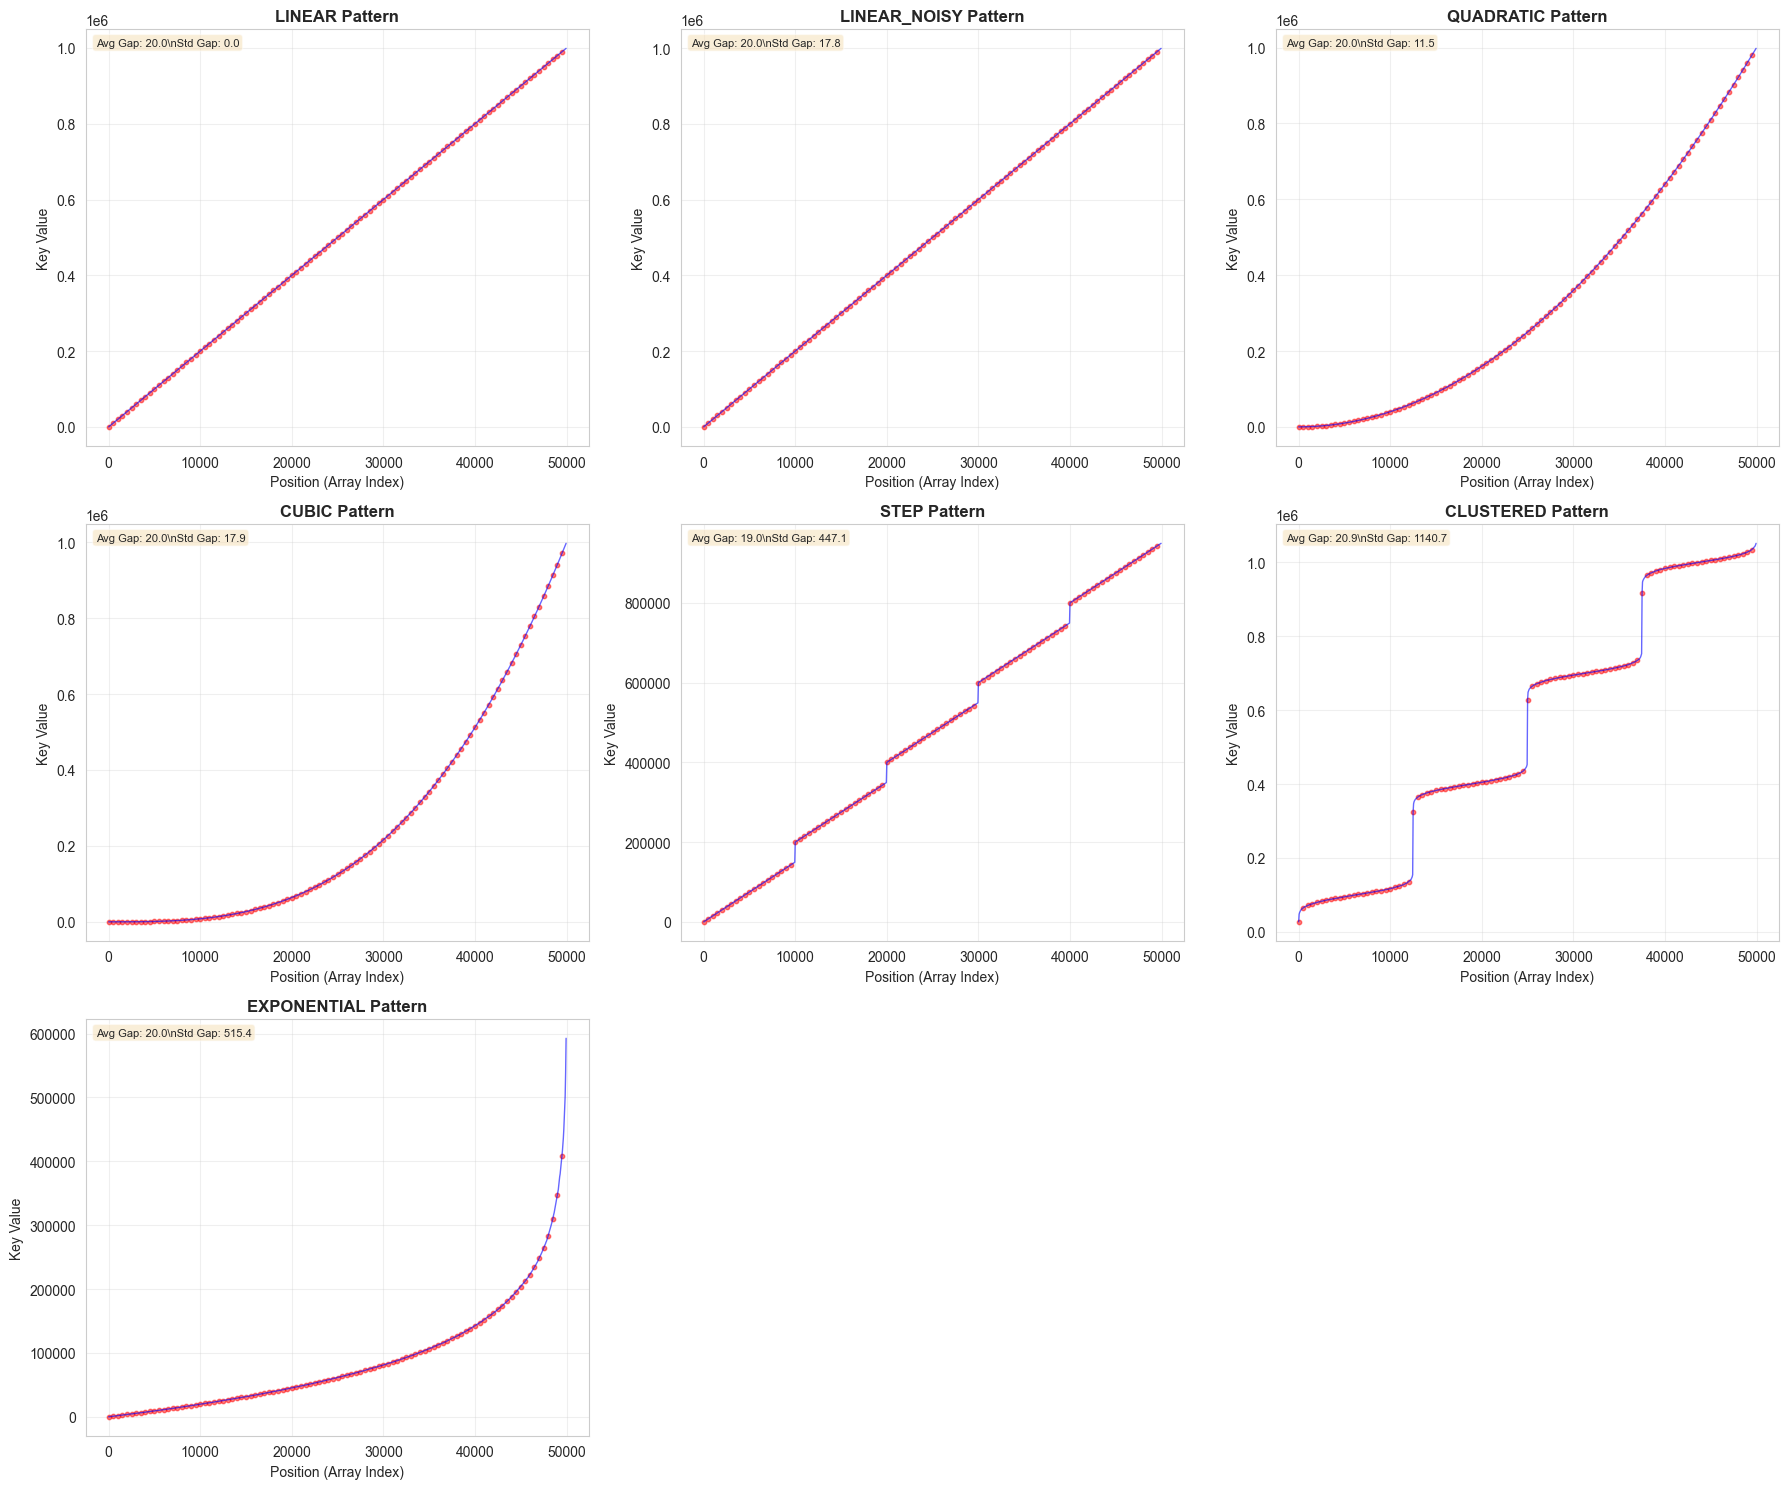

In [4]:
# ==============================================================================
# PART 3: VISUALIZATION
# ==============================================================================

print("\\n" + "="*80)
print("VISUALIZING DATA PATTERNS")
print("="*80)

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, (name, (keys, positions)) in enumerate(datasets.items()):
    ax = axes[idx]

    # Plot key vs position (this shows the CDF-like curve)
    ax.plot(positions[::50], keys[::50], 'b-', alpha=0.6, linewidth=1)
    ax.scatter(positions[::500], keys[::500], c='red', s=10, alpha=0.5)

    ax.set_title(f'{name.upper()} Pattern', fontsize=12, fontweight='bold')
    ax.set_xlabel('Position (Array Index)', fontsize=10)
    ax.set_ylabel('Key Value', fontsize=10)
    ax.grid(True, alpha=0.3)

    # Add statistics
    gap_mean = np.mean(np.diff(keys))
    gap_std = np.std(np.diff(keys))
    ax.text(0.02, 0.98, f'Avg Gap: {gap_mean:.1f}\\nStd Gap: {gap_std:.1f}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            fontsize=8)

# Remove extra subplots
for idx in range(len(datasets), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('data_patterns_overview.png', dpi=150, bbox_inches='tight')
print("\\n✓ Saved visualization: data_patterns_overview.png")
plt.show()

In [5]:
# ==============================================================================
# PART 4: DETAILED STATISTICS
# ==============================================================================

print("\\n" + "="*80)
print("DATASET STATISTICS")
print("="*80)

stats_data = []

for name, (keys, positions) in datasets.items():
    gaps = np.diff(keys)

    stats = {
        'Dataset': name,
        'Size': len(keys),
        'Key Range': f"{keys.min():.0f} - {keys.max():.0f}",
        'Avg Gap': f"{gaps.mean():.2f}",
        'Std Gap': f"{gaps.std():.2f}",
        'Min Gap': f"{gaps.min():.2f}",
        'Max Gap': f"{gaps.max():.2f}",
        'Gap Variance': f"{gaps.var():.2f}"
    }
    stats_data.append(stats)

stats_df = pd.DataFrame(stats_data)
print("\\n", stats_df.to_string(index=False))

\n================================================================================
DATASET STATISTICS
\n      Dataset  Size       Key Range Avg Gap Std Gap Min Gap   Max Gap Gap Variance
      linear 50000     0 - 1000000   20.00    0.00   20.00     20.00         0.00
linear_noisy 50000   -66 - 1000036   20.00   17.81    0.00    143.50       317.07
   quadratic 50000     0 - 1000000   20.00   11.55    0.00     40.00       133.34
       cubic 50000     0 - 1000000   20.00   17.89    0.00     60.00       320.01
        step 50000      0 - 950000   19.00  447.07   15.00  50000.00    199868.01
   clustered 50000 27154 - 1074327   20.94 1140.70    0.00 154668.25   1301196.00
 exponential 50000     1 - 1000000   20.00  515.42    0.00  69239.69    265655.56


\n================================================================================
GAP DISTRIBUTION VISUALIZATION
\n✓ Saved visualization: gap_distributions.png


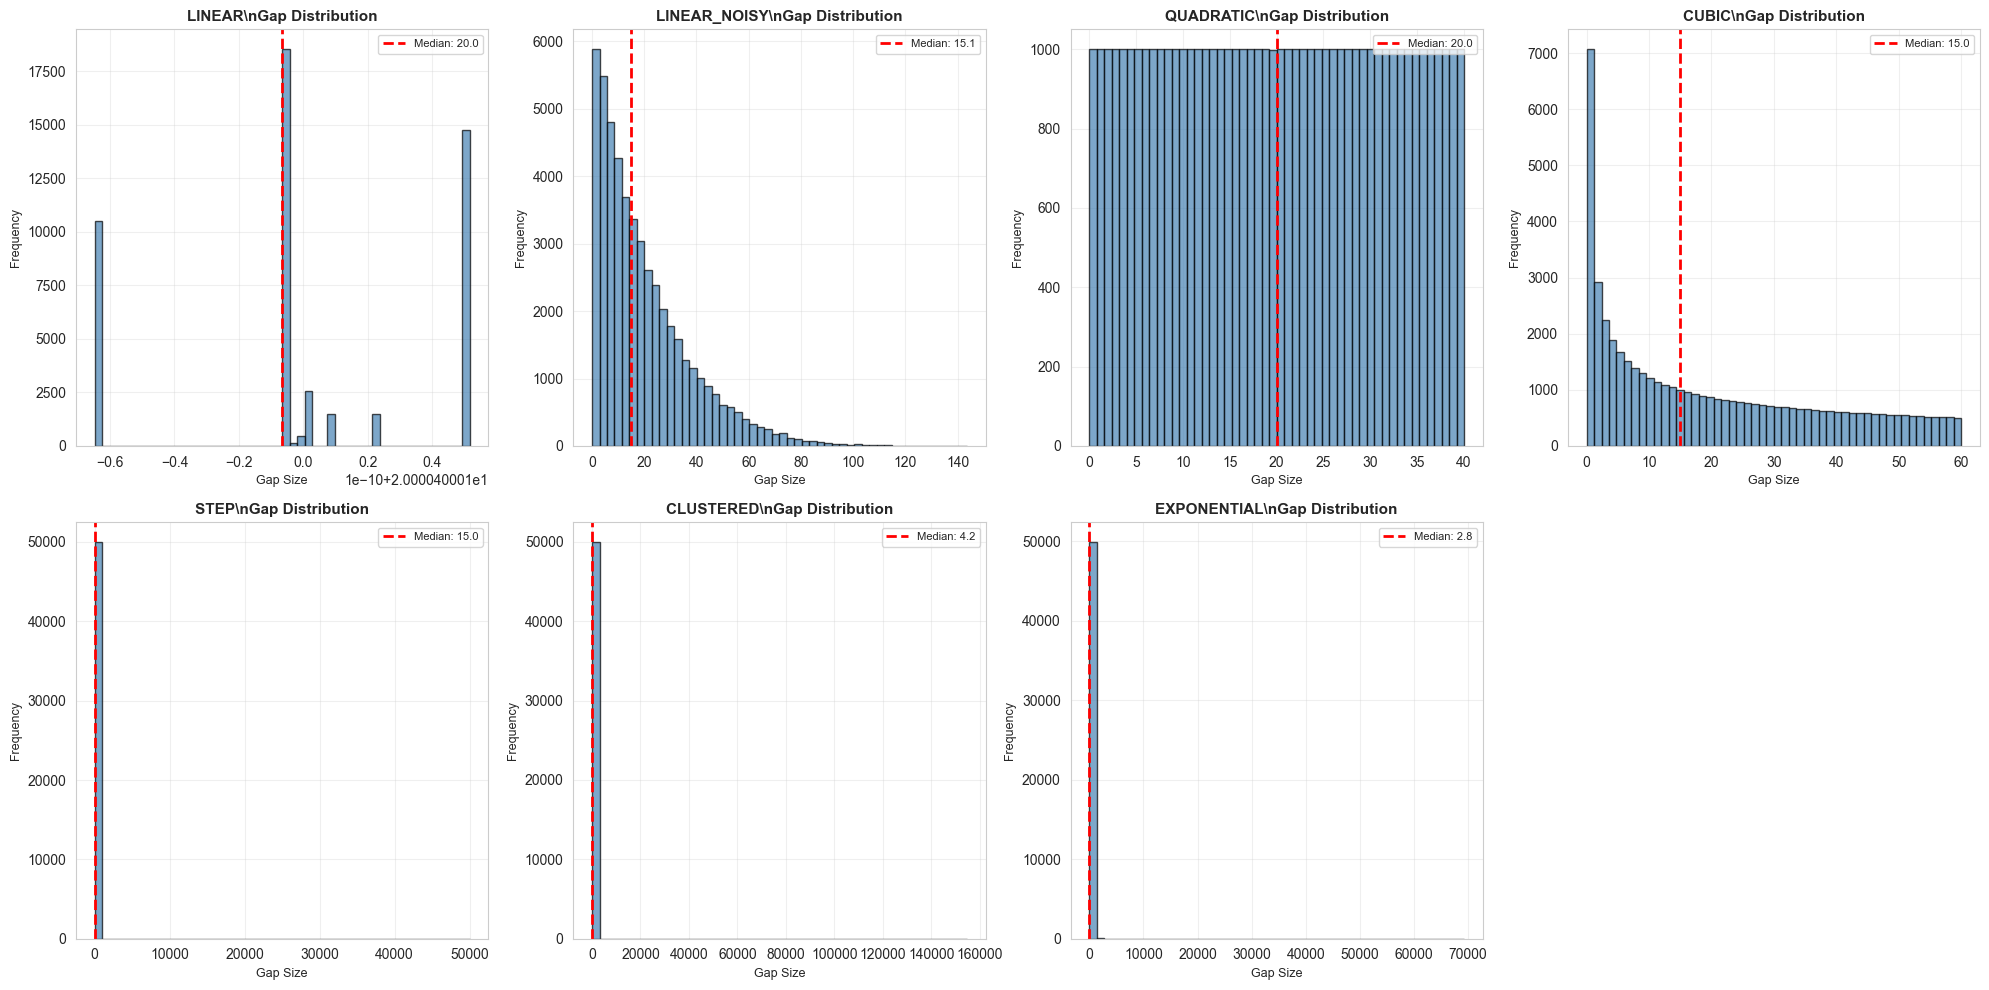

In [6]:
# ==============================================================================
# PART 5: GAP DISTRIBUTION ANALYSIS
# ==============================================================================

print("\\n" + "="*80)
print("GAP DISTRIBUTION VISUALIZATION")
print("="*80)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, (name, (keys, positions)) in enumerate(datasets.items()):
    ax = axes[idx]
    gaps = np.diff(keys)

    # Histogram of gaps
    ax.hist(gaps, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_title(f'{name.upper()}\\nGap Distribution', fontsize=11, fontweight='bold')
    ax.set_xlabel('Gap Size', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.grid(True, alpha=0.3)

    # Add median line
    median_gap = np.median(gaps)
    ax.axvline(median_gap, color='red', linestyle='--', linewidth=2,
               label=f'Median: {median_gap:.1f}')
    ax.legend(fontsize=8)

# Remove extra subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.savefig('gap_distributions.png', dpi=150, bbox_inches='tight')
print("\\n✓ Saved visualization: gap_distributions.png")
plt.show()

In [7]:

# ==============================================================================
# PART 6: SAVE DATASETS
# ==============================================================================

print("\\n" + "="*80)
print("SAVING DATASETS")
print("="*80)

import os
os.makedirs('datasets', exist_ok=True)

for name, (keys, positions) in datasets.items():
    df = pd.DataFrame({
        'key': keys,
        'position': positions
    })

    filename = f'datasets/{name}_50k.csv'
    df.to_csv(filename, index=False)
    print(f"✓ Saved: {filename}")

print("\\n" + "="*80)
print("DATA GENERATION COMPLETE!")
print("="*80)
print("\\nNext steps:")
print("1. Review the visualizations to understand each pattern")
print("2. Open 02_simple_baseline.ipynb to build your first learned index")
print("3. Test which patterns are easy/hard for simple linear regression")
print("="*80)

\n================================================================================
SAVING DATASETS
✓ Saved: datasets/linear_50k.csv
✓ Saved: datasets/linear_noisy_50k.csv
✓ Saved: datasets/quadratic_50k.csv
✓ Saved: datasets/cubic_50k.csv
✓ Saved: datasets/step_50k.csv
✓ Saved: datasets/clustered_50k.csv
✓ Saved: datasets/exponential_50k.csv
\n================================================================================
DATA GENERATION COMPLETE!
\nNext steps:
1. Review the visualizations to understand each pattern
2. Open 02_simple_baseline.ipynb to build your first learned index
3. Test which patterns are easy/hard for simple linear regression
